In [42]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

from wordcloud import WordCloud

from bs4 import BeautifulSoup
from collections import Counter

import nltk

from nltk.corpus import stopwords

import re
import seaborn as sns
from PIL import Image
# create text with Markdown from within code cells¶
from IPython.display import Markdown as md 





In [2]:
import tensorflow as tf
print(tf.__version__)

/home/raj/anaconda3/envs/object_classify/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/raj/anaconda3/envs/object_classify/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/raj/anaconda3/envs/object_classify/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/raj/anaconda3/envs/obj

1.9.0


In [5]:
from gensim.models import word2vec

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.metrics import roc_curve,roc_auc_score,auc

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [7]:
train_set = pd.read_csv('train.csv')

In [8]:
pd.set_option('display.max_colwidth', -1)

In [9]:
train_set.size

38065

In [10]:
train_set.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


## Exploratory Data Analysis

In [27]:
# Count target values by its factor
x = train_set.target.value_counts()
print("The amount disaster tweets is {}. And the amount for not disaster is {}.".
     format(x[1], x[0]))

The amount disaster tweets is 3271. And the amount for not disaster is 4342.


Text(0.5,0,'Target')

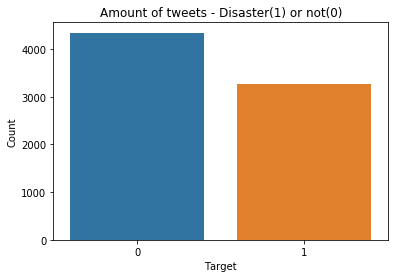

In [28]:
# Add title
plt.title("Amount of tweets - Disaster(1) or not(0)")
# Bar chart showing amount of both target values
sns.barplot(x.index,x)
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Target")

Text(0.5,1,'Disaster')

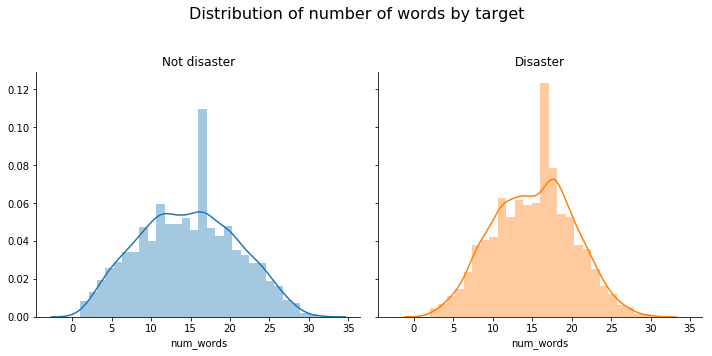

In [38]:
# Facet a plot by target column
g = sns.FacetGrid(train_set, col = 'target', height = 5, hue = 'target')
# Plot a histogram chart
g.map(sns.distplot, "num_words")
# Adjust title position
g.fig.subplots_adjust(top=0.8)
# Add general title
g.fig.suptitle('Distribution of number of words by target', fontsize=16)
# Set title to each chart
axes = g.axes.flatten()
axes[0].set_title("Not disaster")
axes[1].set_title("Disaster")


Text(0.5,0,'Target')

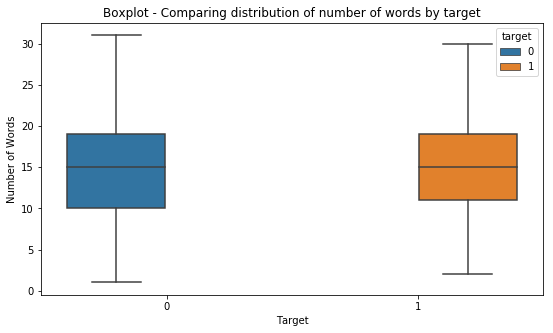

In [39]:
plt.figure(figsize=(9,5))
# Add title
plt.title("Boxplot - Comparing distribution of number of words by target")
# Boxplot
sns.boxplot(x = "target", y = "num_words", hue="target", data = train_set)
# Add label for vertical axis
plt.ylabel("Number of Words")
# Add label for hotizontal axis
plt.xlabel("Target")

In [12]:
test_set = pd.read_csv('test.csv')

In [13]:
test_set.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [14]:
x_train = train_set.text

y_train = train_set['target']

In [15]:
print(len(y_train))

7613


In [16]:
x_train.head()

0    Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                
1    Forest fire near La Ronge Sask. Canada                                                                                               
2    All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3    13,000 people receive #wildfires evacuation orders in California                                                                     
4    Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school                                              
Name: text, dtype: object

In [31]:
# Datasets shape
print('Train dataset:\n{} rows\n{} columns'.format(train_set.shape[0], train_set.shape[1]))
print('\nTest dataset:\n{} rows\n{} columns'.format(test_set.shape[0], test_set.shape[1]))

Train dataset:
7613 rows
5 columns

Test dataset:
3263 rows
4 columns


In [32]:
proportion = x/train_set.shape[0] # Compute the tweets proportion by target
md("The percentual of disaster tweets is {}%, and {}% for not disaster.".
     format(round(proportion[1]*100,0),round(proportion[0]*100, 0)))

The percentual of disaster tweets is 43.0%, and 57.0% for not disaster.

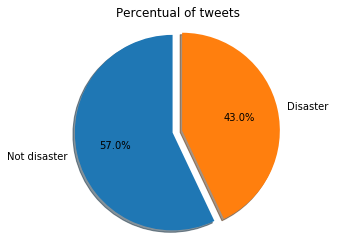

In [33]:

fig1, ax1 = plt.subplots()
ax1.pie(proportion, 
        explode = (0, 0.1), # only "explode" the 2nd slice
        labels  = ['Not disaster', 'Disaster'], 
        autopct = '%1.1f%%',
        shadow = True, 
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentual of tweets")
plt.show()

In [34]:
# Create a new feature with text lenght, or number of characters
train_set['length'] = train_set['text'].str.len()
# Create a new feature with number of words
train_set['num_words'] = train_set['text'].str.split().map(lambda x: len(x))
train_set.head(3)

,id,keyword,location,text,target,length,num_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,22


In [35]:
# Text length summary by target
train_set.groupby(['target']).length.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,4342.0,95.706817,35.885924,7.0,68.0,101.0,130.0,157.0
1,3271.0,108.113421,29.309854,14.0,88.0,115.0,136.0,151.0


Text(0.5,1,'Disaster')

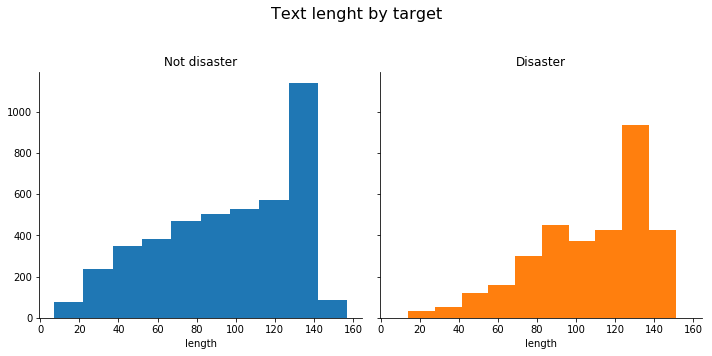

In [36]:
g = sns.FacetGrid(train_set, col = 'target', height = 5, hue = 'target')
# Plot a histogram chart
g.map(plt.hist, "length")
# Adjust title position
g.fig.subplots_adjust(top=0.8)
# Add general title
g.fig.suptitle('Text lenght by target', fontsize=16)
# Set title to each chart
axes = g.axes.flatten()
axes[0].set_title("Not disaster")
axes[1].set_title("Disaster")

In [43]:
# Function to compute many unique words have this text
def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [45]:
text_values = train_set["text"]
counter = counter_word(text_values)
md("The training dataset has {} unique words".format(len(counter)))

The training dataset has 31924 unique words

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

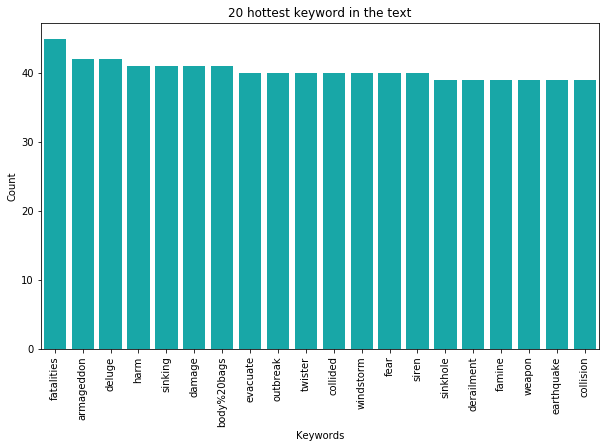

In [47]:
# Groups the top 20 keywords
x = train_set.keyword.value_counts()[:20]
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Add title
plt.title("20 hottest keyword in the text")
# Bar chart showing amount of both target values
sns.barplot(x.index, x, color="c")
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Keywords")
# Rotate the label text for hotizontal axis
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

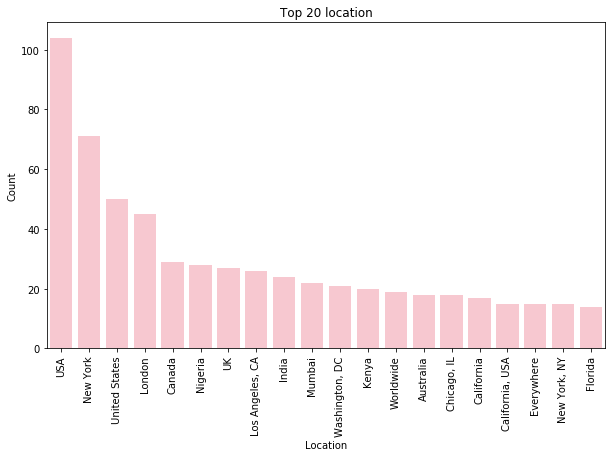

In [48]:
# Groups the top 20 location
x = train_set.location.value_counts()[:20]
# Set the width and height of the figure
plt.figure(figsize=(10,6))
# Add title
plt.title("Top 20 location")
# Bar chart showing amount of both target values
sns.barplot(x.index, x, color = "pink")
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Location")
# Rotate the label text for hotizontal axis
plt.xticks(rotation=90)

## Data Preprocessing 

In [17]:
def clean_data(sentence, remove_stopwords = True,string = True):
    
    sentence = BeautifulSoup(sentence).get_text()
    
    sentence = re.sub("[^a-zA-Z]"," ",sentence)
    #sentence.replace(/^(?:https?:\/\/)?(?:www\.)?/i, "").split('/')[0]
    
    words = sentence.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        
        words  = [word for word in words if word not in stops and word not in ['http','https']]
        
    if string:
        
        return " ".join(words)
    
    else:
        
        return words
    
    

In [70]:
train_set['text'] = train_set['text'].apply(lambda x: clean_data(x))
test_set['text'] = test_set['text'].apply(lambda x: clean_data(x))

In [64]:
x_train = [clean_data(text) for text in x_train]

In [58]:
#x_train = re.sub("[^a-zA-Z]"," ",train_set['text'][0])

In [65]:
x_test = [clean_data(text) for text in test_set['text']]

In [71]:
# Dictionary of abbreviations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [76]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

#def convert_abbrev_in_text(text):
 ### text = ' '.join(tokens)
   # return text

In [78]:
# Appy abbreviation to text
x_train= train_set['text'].apply(lambda x: convert_abbrev(x))
x_test = test_set['text'].apply(lambda x: convert_abbrev(x))

In [79]:
x_train[0:5]

0    deeds reason earthquake may allah forgive us                                            
1    forest fire near la ronge sask canada                                                   
2    residents asked shelter place notified officers evacuation shelter place orders expected
3    people receive wildfires evacuation orders california                                   
4    got sent photo ruby alaska smoke wildfires pours school                                 
Name: text, dtype: object

In [80]:
train_set["text"][0]

'deeds reason earthquake may allah forgive us'

In [81]:
text

'Our Deeds are the Reason of this  earthquake May ALLAH Forgive us all'

In [82]:
def show_wordcloud(text,title = None):
    
    wordcloud = WordCloud( background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(text))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()
    

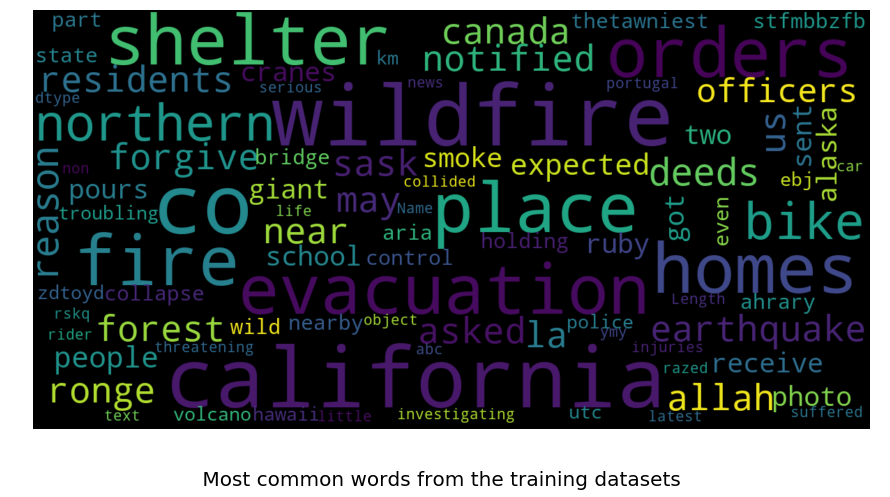

In [83]:
show_wordcloud(x_train,title = " Most common words from the training datasets")

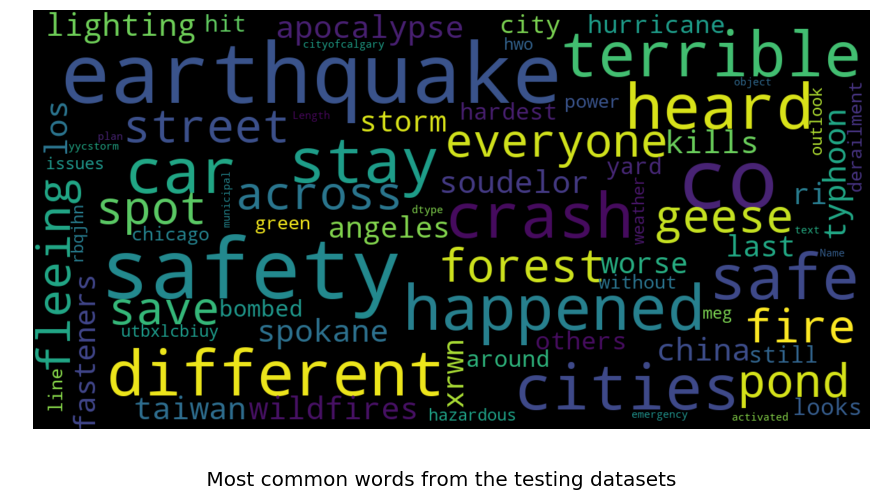

In [84]:
show_wordcloud(x_test,title = " Most common words from the testing datasets")

In [88]:
print(len(x_test))
print(type(x_test))

3263
<class 'pandas.core.series.Series'>


In [91]:
print(len(x_train))
print(type(x_train))

7613
<class 'pandas.core.series.Series'>


In [62]:
x1_train = x_train
print(len(x1_train))

7613


In [92]:
tfidfVectorizer = TfidfVectorizer(min_df=2,max_features= 5000)
tfidf_train_feat = tfidfVectorizer.fit_transform(x_train)
tfidf_test_feat =  tfidfVectorizer.transform(x_test)


In [93]:
tfidfVectorizer.get_feature_names()

['aa',
 'ab',
 'aba',
 'abandon',
 'abandoned',
 'abbott',
 'abbswinston',
 'abc',
 'abcnews',
 'abe',
 'abia',
 'ability',
 'ablaze',
 'able',
 'abomination',
 'abortion',
 'absolutely',
 'abstorm',
 'abuse',
 'abused',
 'ac',
 'acc',
 'access',
 'accident',
 'accidentally',
 'accidents',
 'accionempresa',
 'according',
 'account',
 'accounts',
 'accused',
 'accuses',
 'acid',
 'acquisitions',
 'acres',
 'across',
 'act',
 'acting',
 'action',
 'actions',
 'activated',
 'activates',
 'active',
 'activity',
 'actress',
 'acts',
 'actual',
 'actually',
 'acute',
 'ad',
 'add',
 'added',
 'adding',
 'address',
 'admits',
 'adult',
 'adults',
 'advance',
 'adventures',
 'advisory',
 'ae',
 'af',
 'affected',
 'affecting',
 'affects',
 'affiliation',
 'afghan',
 'afghanistan',
 'afp',
 'afraid',
 'africa',
 'africans',
 'afterlife',
 'afternoon',
 'aftershock',
 'ag',
 'age',
 'agents',
 'ages',
 'ago',
 'agree',
 'agreed',
 'ah',
 'ahead',
 'ahh',
 'ahrary',
 'ai',
 'aid',
 'aim',
 'air',

In [96]:
first_vector_tfidfvectorizer=tfidf_train_feat[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidfVectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)
 

,tfidf
forgive,0.530811
allah,0.458510
reason,0.413955
earthquake,0.368186
may,0.327911
...,...
forest,0.000000
foreign,0.000000
forecast,0.000000
ford,0.000000


In [97]:
# Bag Of Word 
Vectorizer = CountVectorizer(analyzer="word",tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,
                            max_features = 5000)

train_feat = Vectorizer.fit_transform(x_train).toarray()

test_feat  = Vectorizer.transform(x_test).toarray()

In [98]:
Vectorizer.vocabulary_

{'deeds': 1082,
 'reason': 3514,
 'earthquake': 1290,
 'may': 2647,
 'allah': 103,
 'us': 4609,
 'forest': 1666,
 'fire': 1599,
 'near': 2895,
 'la': 2368,
 'canada': 622,
 'residents': 3598,
 'asked': 225,
 'shelter': 3885,
 'place': 3247,
 'officers': 3024,
 'evacuation': 1424,
 'orders': 3082,
 'expected': 1461,
 'people': 3187,
 'wildfires': 4815,
 'california': 602,
 'got': 1823,
 'sent': 3838,
 'photo': 3213,
 'alaska': 96,
 'smoke': 3996,
 'school': 3785,
 'rockyfire': 3681,
 'update': 4597,
 'hwy': 2075,
 'closed': 799,
 'due': 1269,
 'lake': 2376,
 'county': 934,
 'flood': 1633,
 'disaster': 1178,
 'heavy': 1959,
 'rain': 3469,
 'causes': 672,
 'flash': 1624,
 'flooding': 1635,
 'streets': 4160,
 'colorado': 839,
 'springs': 4087,
 'areas': 194,
 'top': 4431,
 'hill': 1991,
 'see': 3815,
 'emergency': 1353,
 'happening': 1913,
 'building': 557,
 'across': 32,
 'street': 4159,
 'afraid': 65,
 'tornado': 4433,
 'coming': 849,
 'area': 193,
 'three': 4371,
 'died': 1159,
 'heat':

In [99]:
x_train , x_val,y_train,y_val = train_test_split(train_feat,y_train,test_size =0.2)

In [100]:
print(len(y_train))

6090


In [102]:
#tf_x_train , tf_x_val,y_train,y_val = train_test_split(tfidf_train_feat,y_train,test_size =0.2)

In [103]:
print("length of x_train :{} and x_val :{} and y_train :{} and y_val :{}".format(len(x_train),len(x_val),len(y_train),len(y_val)))

length of x_train :6090 and x_val :1523 and y_train :6090 and y_val :1523


In [104]:

def predict(test_feat,train_feat,y_test,y_train,model,title = "Random forest"):
    
    model.fit(train_feat,y_train)
    
    preds = model.predict(test_feat)
    
    fpr,tpr,_ = roc_curve(y_test,preds)
    
    roc_auc = auc(fpr,tpr)
    
    print("AUC :",roc_auc)
    
    plt.plot(fpr,tpr)
    
    plt.title(title)
    
    plt.plot([0,1],[0,1],color = "navy",linestyle ="--")
    
    
    plt.xlabel("False positive Rate")
    
    plt.ylabel("True positive Rate")
    
    plt.show()
    
    return preds


AUC : 0.7645626303521039


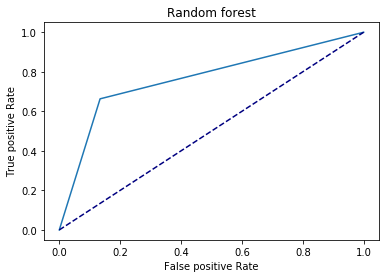

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       967
           1       0.66      0.79      0.72       556

    accuracy                           0.78      1523
   macro avg       0.76      0.78      0.77      1523
weighted avg       0.79      0.78      0.78      1523

Accuracy:

0.7774130006565988
AUC : 0.7883598857283068


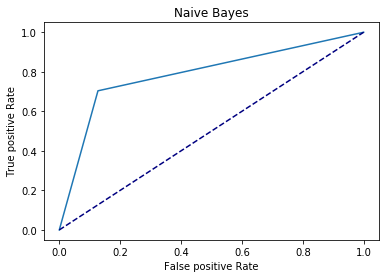

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       946
           1       0.70      0.81      0.75       577

    accuracy                           0.80      1523
   macro avg       0.79      0.80      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Accuracy:

0.799080761654629


In [105]:
preds_rf = predict(x_val,x_train,y_val,y_train,RandomForestClassifier(n_estimators=100))
print(classification_report(preds_rf,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_rf,y_val))
preds_nb = predict(x_val,x_train,y_val,y_train,MultinomialNB(),title = "Naive Bayes")
print(classification_report(preds_nb,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_nb,y_val))

In [106]:
from sklearn.metrics import classification_report,confusion_matrix
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

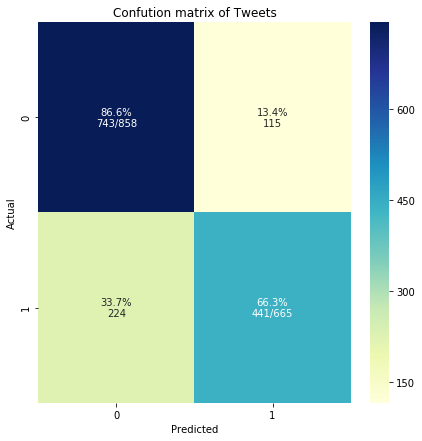

In [108]:
# Showing Confusion Matrix
plot_cm(y_val,preds_rf, 'Confution matrix of Tweets', figsize=(7,7))


AUC : 0.7533194875300139


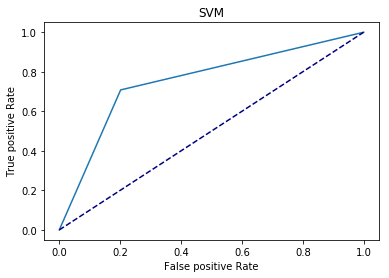

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       879
           1       0.71      0.73      0.72       644

    accuracy                           0.76      1523
   macro avg       0.75      0.76      0.75      1523
weighted avg       0.76      0.76      0.76      1523

Accuracy:

0.7590282337491793


In [109]:
preds_nb = predict(x_val,x_train,y_val,y_train,LinearSVC(),title = "SVM")
print(classification_report(preds_nb,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_nb,y_val))

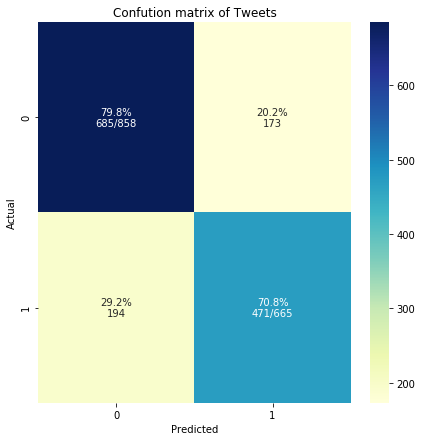

In [110]:
# Showing Confusion Matrix
plot_cm(y_val,preds_nb, 'Confution matrix of Tweets', figsize=(7,7))

AUC : 0.7677944862155388


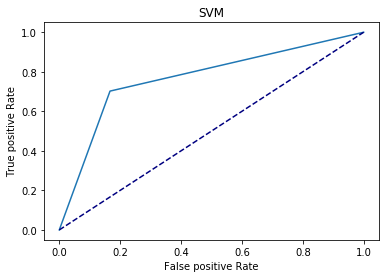

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       913
           1       0.70      0.77      0.73       610

    accuracy                           0.78      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

Accuracy:

0.7760998030203545


In [111]:

preds_nb = predict(x_val,x_train,y_val,y_train,SVC(kernel="poly", degree=2, coef0=1, C=5),title = "SVM")
print(classification_report(preds_nb,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_nb,y_val))

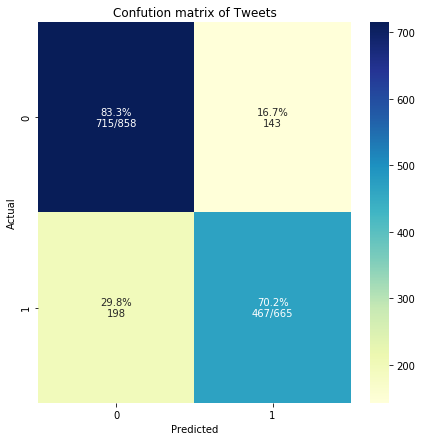

In [112]:
# Showing Confusion Matrix
plot_cm(y_val,preds_nb, 'Confution matrix of Tweets', figsize=(7,7))

# Tf-idf 

AUC : 0.7825265985462974


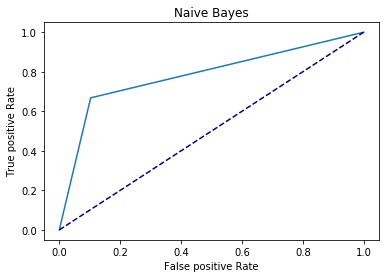

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       993
           1       0.67      0.83      0.74       530

    accuracy                           0.80      1523
   macro avg       0.78      0.81      0.79      1523
weighted avg       0.82      0.80      0.80      1523

Accuracy:

0.7977675640183848


In [41]:
preds_nb = predict(tf_x_val,tf_x_train,y_val,y_train,MultinomialNB(),title = "Naive Bayes")
print(classification_report(preds_nb,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_nb,y_val))

AUC : 0.776509006636469


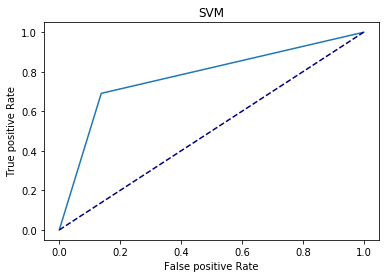

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       948
           1       0.69      0.79      0.74       575

    accuracy                           0.79      1523
   macro avg       0.78      0.79      0.78      1523
weighted avg       0.80      0.79      0.79      1523

Accuracy:

0.7879185817465528


In [42]:
preds_nb = predict(tf_x_val,tf_x_train,y_val,y_train,LinearSVC(),title = "SVM")
print(classification_report(preds_nb,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_nb,y_val))

AUC : 0.7554733312265178


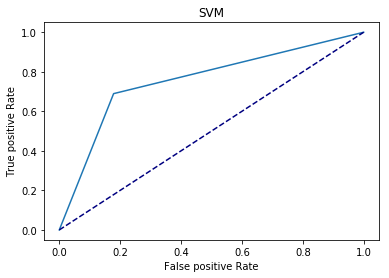

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       914
           1       0.69      0.75      0.72       609

    accuracy                           0.76      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.77      0.76      0.77      1523

Accuracy:

0.7642810242941562


In [43]:
preds_nb = predict(tf_x_val,tf_x_train,y_val,y_train,SVC(kernel="poly", degree=2, coef0=1, C=5),title = "SVM")
print(classification_report(preds_nb,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_nb,y_val))

In [69]:
embedding_dim = 200

tweets = [sentence.split() for sentence in x1_train]

print(len(tweets))
tweets[0:2]

7613


[['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']]

In [75]:
model1 = word2vec.Word2Vec(sentences =tweets,
                          size = embedding_dim,
                          window=5,
                          min_count=1,
                          sg = 1,
                          workers= 4,
                          negative= 10
                         
                         
                         )


In [89]:
model.train(tweets, total_examples= len(x1_train), epochs=20)

(14041, 1658500)

In [90]:
words = list(model1.wv.vocab)

In [105]:
# save model 
filename = 'eathequake_tweets_word2vec.txt'

model1.wv.save_word2vec_format(filename,binary = False)

In [91]:
print(len(words))

21978


In [85]:
model1.wv.most_similar(positive="allah")

[('bought', 0.999897301197052),
 ('july', 0.9998966455459595),
 ('holy', 0.9998965859413147),
 ('name', 0.9998930096626282),
 ('feed', 0.9998914003372192),
 ('struck', 0.9998909831047058),
 ('hughes', 0.9998893141746521),
 ('fail', 0.9998891949653625),
 ('meet', 0.9998889565467834),
 ('updated', 0.9998886585235596)]

In [86]:
model1['allah']

/home/raj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.04284272, -0.07060844,  0.2285022 ,  0.12739547,  0.2228804 ,
        0.16306692,  0.05747738,  0.10824782, -0.14110263, -0.08529709,
        0.16604036,  0.22399524, -0.12090359,  0.12090462, -0.25783592,
       -0.07202424,  0.02505102, -0.1046154 , -0.14345272, -0.07876792,
        0.16584238,  0.11840051, -0.00547556,  0.02550024,  0.00044598,
       -0.43860513,  0.20027882, -0.08229848,  0.02944777,  0.06693057,
       -0.16391742, -0.17820911,  0.18601182,  0.09516925,  0.21676596,
        0.1575298 ,  0.0456519 , -0.1791864 ,  0.05739539, -0.23167337,
       -0.03179407,  0.25379437, -0.17717579,  0.04797571,  0.18756065,
        0.01511886, -0.0140408 ,  0.25510427,  0.12560803,  0.01525938,
        0.07876857,  0.10211416, -0.06547139, -0.2878022 , -0.18287353,
        0.02660777, -0.11209435, -0.04030366,  0.19189364,  0.02849048,
       -0.04995589, -0.15103729,  0.03681836,  0.1805545 ,  0.04629248,
       -0.0859659 ,  0.229855  , -0.09562469, -0.10569882,  0.17

In [87]:
print(len(model1['earthquake']))

200


/home/raj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [95]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model1[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec


In [96]:
wordvec_arrays = np.zeros((len(tweets), 200))
for i in range(len(tweets)):
    wordvec_arrays[i,:] = word_vector(tweets[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/home/raj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(7613, 200)

In [104]:
wordvec_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.038576,-0.065812,0.204661,0.114922,0.201170,0.150224,0.050692,0.097344,-0.127473,-0.074003,...,-0.073942,-0.100790,-0.034016,0.274739,0.025978,-0.056747,-0.023602,-0.271697,0.008994,-0.092124
1,-0.032936,-0.068129,0.209075,0.115073,0.194587,0.154652,0.048412,0.100116,-0.124108,-0.077260,...,-0.080135,-0.100722,-0.040203,0.279085,0.027192,-0.049532,-0.024884,-0.279889,0.010521,-0.100606
2,-0.044378,-0.070143,0.222296,0.122265,0.218556,0.159551,0.052811,0.109148,-0.135868,-0.083646,...,-0.077741,-0.105986,-0.038029,0.294587,0.028619,-0.059363,-0.023665,-0.298572,0.012006,-0.102498
3,-0.036683,-0.075791,0.216068,0.129960,0.211024,0.168187,0.043046,0.116069,-0.146917,-0.072224,...,-0.072465,-0.111023,-0.042824,0.305736,0.035926,-0.053507,-0.039978,-0.297671,0.012729,-0.110792
4,-0.039995,-0.068754,0.206664,0.114604,0.198898,0.151499,0.050193,0.101680,-0.126909,-0.074354,...,-0.071809,-0.096768,-0.034826,0.271288,0.029759,-0.052870,-0.024606,-0.276234,0.011764,-0.095647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,-0.044226,-0.070527,0.235833,0.133858,0.246812,0.162224,0.050326,0.125122,-0.154662,-0.078665,...,-0.066954,-0.117504,-0.046122,0.331914,0.031991,-0.056886,-0.035433,-0.308535,0.019031,-0.104053
7609,-0.028869,-0.070439,0.203629,0.130562,0.200654,0.157121,0.038741,0.118978,-0.145184,-0.062080,...,-0.067148,-0.105619,-0.047157,0.299926,0.040347,-0.049907,-0.038036,-0.277880,0.013690,-0.106453
7610,-0.045216,-0.062591,0.209985,0.113579,0.219316,0.138044,0.048309,0.105524,-0.132174,-0.074182,...,-0.062689,-0.105641,-0.039200,0.283907,0.028887,-0.055130,-0.015624,-0.258599,0.008790,-0.087489
7611,-0.048345,-0.074311,0.229397,0.122512,0.228324,0.164868,0.055672,0.114181,-0.141296,-0.087490,...,-0.077733,-0.111520,-0.039314,0.304554,0.029871,-0.060370,-0.025810,-0.301520,0.008177,-0.102406


In [113]:
word2vec_x_train , word2vec_x_val,y_train,y_val = train_test_split(wordvec_df,y_train,test_size =0.2)

In [112]:
print(len(y_train))

7613


# word2_vec embedding 

AUC : 0.7175334394567981


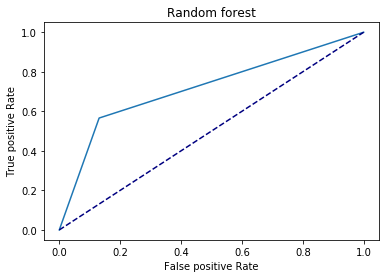

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1040
           1       0.57      0.76      0.65       483

    accuracy                           0.74      1523
   macro avg       0.72      0.75      0.72      1523
weighted avg       0.77      0.74      0.75      1523

Accuracy:

0.7393302692055155


In [117]:
preds_rf = predict(word2vec_x_val,word2vec_x_train,y_val,y_train,RandomForestClassifier(n_estimators=100))
print(classification_report(preds_rf,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_rf,y_val))

AUC : 0.6839707197847478


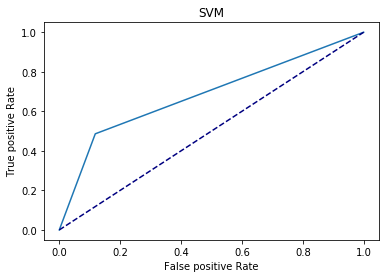

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1103
           1       0.49      0.75      0.59       420

    accuracy                           0.71      1523
   macro avg       0.68      0.73      0.68      1523
weighted avg       0.77      0.71      0.73      1523

Accuracy:

0.7124097176625082


In [120]:
preds_nb = predict(word2vec_x_val,word2vec_x_train,y_val,y_train,LinearSVC(),title = "SVM")
print(classification_report(preds_nb,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_nb,y_val))

AUC : 0.6668495065963247


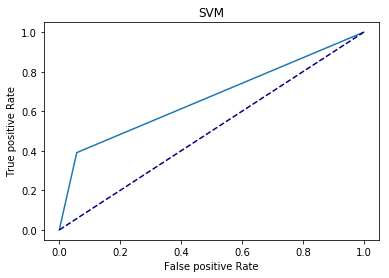

              precision    recall  f1-score   support

           0       0.94      0.67      0.79      1218
           1       0.39      0.84      0.53       305

    accuracy                           0.71      1523
   macro avg       0.67      0.76      0.66      1523
weighted avg       0.83      0.71      0.74      1523

Accuracy:

0.706500328299409


In [121]:
preds_nb = predict(word2vec_x_val,word2vec_x_train,y_val,y_train,SVC(kernel="poly", degree=2, coef0=1, C=5),title = "SVM")
print(classification_report(preds_nb,y_val))
print("Accuracy:\n")
print(accuracy_score(preds_nb,y_val))